# Code for D212-Task3 Market Basket Analysis
Association Rules
# 1 - Import Packages

In [15]:
# Enable inline plotting in the notebook. Comes before importing matplotlib
%matplotlib inline
# import packages
# Import pandas for data manipulation and working with dataframes
import pandas as pd
# Import numpy to perform numerical operations
import numpy as np
# Machine learning extended
from mlxtend.preprocessing import TransactionEncoder # transform data
from mlxtend.frequent_patterns import association_rules, apriori
# Print the versions of packages
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
import sklearn
print(f"sklearn version: {sklearn.__version__}")
import mlxtend
print(f"mlxtend version: {mlxtend.__version__}")

import seaborn as sns
import matplotlib.pyplot as plt

c:\ProgramData\miniforge3\lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


Pandas version: 2.0.0
Numpy version: 1.26.3
sklearn version: 1.3.0
mlxtend version: 0.23.0


## Load Data

In [2]:
# Import Data
df = pd.read_csv('c:/LabFiles/d212-data/churn/teleco_market_basket.csv ') # path to csv; change for your environment
pd.set_option("display.max_columns", None) # to display all columns
# Examine first couple rows
df.head(5)       

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item01  7501 non-null   object
 1   Item02  5747 non-null   object
 2   Item03  4389 non-null   object
 3   Item04  3345 non-null   object
 4   Item05  2529 non-null   object
 5   Item06  1864 non-null   object
 6   Item07  1369 non-null   object
 7   Item08  981 non-null    object
 8   Item09  654 non-null    object
 9   Item10  395 non-null    object
 10  Item11  256 non-null    object
 11  Item12  154 non-null    object
 12  Item13  87 non-null     object
 13  Item14  47 non-null     object
 14  Item15  25 non-null     object
 15  Item16  8 non-null      object
 16  Item17  4 non-null      object
 17  Item18  4 non-null      object
 18  Item19  3 non-null      object
 19  Item20  1 non-null      object
dtypes: object(20)
memory usage: 2.3+ MB


In [4]:
df.shape

(15002, 20)

## B2 - Transaction Example

In [5]:
df.iloc[1]

Item01               Logitech M510 Wireless mouse
Item02                                  HP 63 Ink
Item03                                  HP 65 ink
Item04                 nonda USB C to USB Adapter
Item05                  10ft iPHone Charger Cable
Item06                               HP 902XL ink
Item07               Creative Pebble 2.0 Speakers
Item08        Cleaning Gel Universal Dust Cleaner
Item09              Micro Center 32GB Memory card
Item10    YUNSONG 3pack 6ft Nylon Lightning Cable
Item11               TopMate C5 Laptop Cooler pad
Item12                  Apple USB-C Charger cable
Item13               HyperX Cloud Stinger Headset
Item14                TONOR USB Gaming Microphone
Item15             Dust-Off Compressed Gas 2 pack
Item16             3A USB Type C Cable 3 pack 6FT
Item17                      HOVAMP iPhone charger
Item18                   SanDisk Ultra 128GB card
Item19       FEEL2NICE 5 pack 10ft Lighning cable
Item20        FEIYOLD Blue light Blocking Glasses


# 2 - Clean the Data

In [6]:
# Drop rows
df = df[df['Item01'].notna()] #remove rows with Not Null values
df.shape

(7501, 20)

# 3 - (C1) Transform the Data

In [7]:
# Transform original data suitable for Apriori Algorithm
# dataframe converted to list of lists
# https://towardsdatascience.com/apriori-algorithm-for-association-rule-learning-how-to-find-clear-links-between-transactions-bf7ebc22cf0a
rows = []
for i in range (0, 7501):
    rows.append([str(df.values[i,j])
for j in range (0, 20)])
# Feed list to transaction encoder
DE = TransactionEncoder()
array = DE.fit(rows).transform(rows)
# Return array back to DataFrame
transaction = pd.DataFrame(array, columns = DE.columns_)
# transaction # visually inspect
# Remove NAN column from the dataset
cleaned_df = transaction.drop(['nan'], axis = 1)
cleaned_df.head(7505)
# save the cleaned dataset
cleaned_df.to_csv('illovsky_d212_task3_MBA_churn_cleaned.csv', index = False)

In [8]:
for col in cleaned_df.columns:
    print(col)
# look for empty columns (does it say 'nan'?).  

10ft iPHone Charger Cable
10ft iPHone Charger Cable 2 Pack
3 pack Nylon Braided Lightning Cable
3A USB Type C Cable 3 pack 6FT
5pack Nylon Braided USB C cables
ARRIS SURFboard SB8200 Cable Modem
Anker 2-in-1 USB Card Reader
Anker 4-port USB hub
Anker USB C to HDMI Adapter
Apple Lightning to Digital AV Adapter
Apple Lightning to USB cable
Apple Magic Mouse 2
Apple Pencil
Apple Pencil 2nd Gen
Apple Power Adapter Extension Cable
Apple USB-C Charger cable
AutoFocus 1080p Webcam
BENGOO G90000 headset
Blue Light Blocking Glasses
Blue Light Blocking Glasses 2pack
Brother Genuine High Yield Toner Cartridge
Cat 6 Ethernet Cable 50ft
Cat8 Ethernet Cable
CicTsing MM057 2.4G Wireless Mouse
Cleaning Gel Universal Dust Cleaner
Creative Pebble 2.0 Speakers
DisplayPort ot HDMI adapter
Dust-Off Compressed Gas
Dust-Off Compressed Gas 2 pack
FEEL2NICE 5 pack 10ft Lighning cable
FEIYOLD Blue light Blocking Glasses
Falcon Dust Off Compressed Gas
HOVAMP Mfi 6pack Lightning Cable
HOVAMP iPhone charger
HP 61 

# 4 - (C2) Apriori algorithm used to create association rules 

In [9]:
pd.set_option("max_colwidth", None) # view full width of column
rules = pd.DataFrame(apriori(cleaned_df, min_support=0.02, use_colnames= True)) # set of items purchased together
rules = rules.sort_values(by='support', ascending=False)
rules
# print(rules.to_string())

,support,itemsets
9,0.238368,(Dust-Off Compressed Gas 2 pack)
5,0.179709,(Apple Pencil)
46,0.174110,(VIVO Dual LCD Monitor Desk mount)
43,0.170911,(USB 2.0 Printer cable)
14,0.163845,(HP 61 ink)
...,...,...
17,0.020397,(HP 63 Ink)
79,0.020264,"(Dust-Off Compressed Gas 2 pack, SanDisk Ultra 128GB card)"
78,0.020131,"(Dust-Off Compressed Gas 2 pack, Premium Nylon USB Cable)"
75,0.020131,"(Dust-Off Compressed Gas 2 pack, HP 62XL Tri-Color ink)"


# 5 - (C3) Association Rules Table

In [10]:
rule_table = association_rules(rules, metric = 'lift', min_threshold=1.7) # create the rules of association
rule_table = rule_table[['antecedents','consequents','support','confidence','lift']] # select columns of interest
# Set the maximum number of rows to display to None
pd.set_option('display.max_rows', None)
rule_table
# make recommendation based on rules. the higher the lift the stronger the liklihood both items are purchased

,antecedents,consequents,support,confidence,lift
0,(Dust-Off Compressed Gas 2 pack),(SanDisk Ultra 64GB card),0.040928,0.171700,1.747522
1,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.040928,0.416554,1.747522
2,(VIVO Dual LCD Monitor Desk mount),(SanDisk Ultra 64GB card),0.039195,0.225115,2.291162
3,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.039195,0.398915,2.291162
4,(Apple Lightning to Digital AV Adapter),(Apple Pencil),0.028796,0.330275,1.837830
5,(Apple Pencil),(Apple Lightning to Digital AV Adapter),0.028796,0.160237,1.837830
6,(Dust-Off Compressed Gas 2 pack),(FEIYOLD Blue light Blocking Glasses),0.027596,0.115772,1.757904
7,(FEIYOLD Blue light Blocking Glasses),(Dust-Off Compressed Gas 2 pack),0.027596,0.419028,1.757904
8,(Nylon Braided Lightning to USB cable),(Screen Mom Screen Cleaner kit),0.023597,0.247552,1.910382
9,(Screen Mom Screen Cleaner kit),(Nylon Braided Lightning to USB cable),0.023597,0.182099,1.910382


# 6 - (C4) Top Three Rules

In [11]:
# only need one.
top_three_rules = rule_table.sort_values('confidence', ascending=False).head(3)
top_three_rules

,antecedents,consequents,support,confidence,lift
11,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.023064,0.456464,1.914955
7,(FEIYOLD Blue light Blocking Glasses),(Dust-Off Compressed Gas 2 pack),0.027596,0.419028,1.757904
1,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.040928,0.416554,1.747522


In [14]:
top_five_rules = rule_table.sort_values('lift', ascending=False).head(5)
top_five_rules

,antecedents,consequents,support,confidence,lift
2,(VIVO Dual LCD Monitor Desk mount),(SanDisk Ultra 64GB card),0.039195,0.225115,2.291162
3,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.039195,0.398915,2.291162
13,(FEIYOLD Blue light Blocking Glasses),(VIVO Dual LCD Monitor Desk mount),0.022930,0.348178,1.999758
12,(VIVO Dual LCD Monitor Desk mount),(FEIYOLD Blue light Blocking Glasses),0.022930,0.131700,1.999758
10,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable 2 Pack),0.023064,0.096756,1.914955


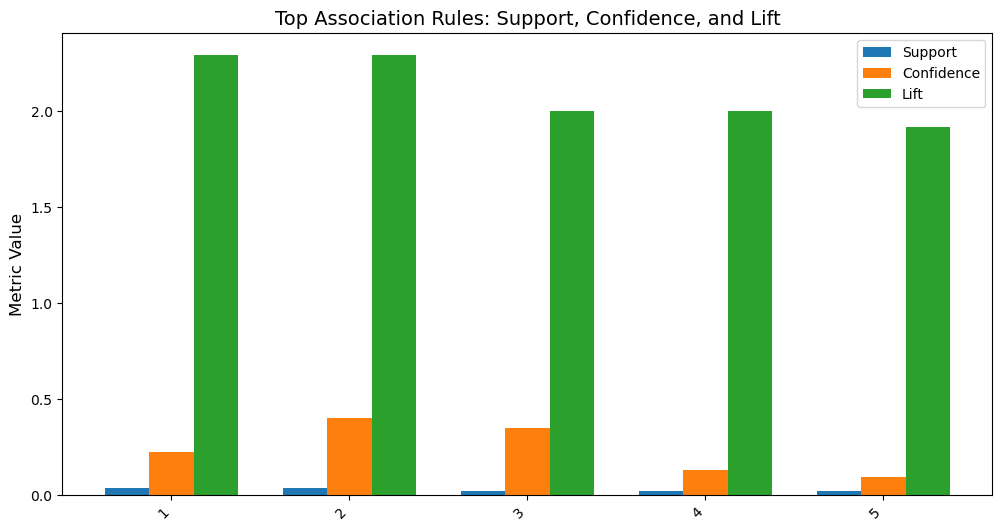

In [26]:
rules_df = top_five_rules
# Get a list of the rule labels (combine antecedent and consequent)
# rule_labels = [f"{row['antecedents']} -> {row['consequents']}" for _, row in rules_df.iterrows()]
rule_labels = ['1', '2', '3', '4', '5']
# Get the metric values 
support = rules_df['support'].values
confidence = rules_df['confidence'].values
lift = rules_df['lift'].values

# Set positions of bars on x-axis
x = np.arange(len(rule_labels))  
width = 0.25  # Width of each bar

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6)) 
rects1 = ax.bar(x - width, support, width, label='Support')
rects2 = ax.bar(x, confidence, width, label='Confidence')
rects3 = ax.bar(x + width, lift, width, label='Lift')

# Add labels, title, and legend
ax.set_ylabel('Metric Value', fontsize=12)
ax.set_title('Top Association Rules: Support, Confidence, and Lift', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels([label.replace(',', '') for label in rule_labels], rotation=45, ha='right')
ax.legend()

# Show the plot
plt.show()